In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%matplotlib inline

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
import scipy

In [3]:
c_dataset = ['Timestamp','vIDa', 'vIDb', 'dist_ab', 'v_a_Type', 'v_a_Vel', 'v_a_Lane', 'v_a_Pred', 'v_a_Foll', 'v_count', 'v_mean_vel',
         'delta_vel']

dataset = pd.read_table('D:\\zzzLola\\PhD\\DataSet\\US101\\test\\dataset.txt', sep='\t', header=None, names=c_dataset)

In [4]:
dataset.groupby(['vIDa']).mean()

,Timestamp,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel
vIDa,,,,,,,,,,,
1073,1.118847e+12,1176.158038,336.358825,2,18.189096,2.000000,0.000000,1083.000000,22,18.188940,1.560187e-04
1077,1.118847e+12,1174.572650,351.493100,2,19.986171,1.000000,0.000000,1082.000000,7,19.986171,1.312852e-10
1080,1.118847e+12,1176.740763,332.343251,2,18.027473,3.000000,0.000000,1084.000000,28,18.027505,-3.207551e-05
1081,1.118847e+12,1175.083436,344.489554,2,18.011786,5.000000,0.000000,1092.000000,14,18.011721,6.518059e-05
1082,1.118847e+12,1177.113718,326.420286,2,19.721311,1.000000,243.462048,1086.000000,31,19.721347,-3.530707e-05
1083,1.118847e+12,1180.003564,309.916909,2,17.496698,2.000000,427.171393,1088.000000,55,17.503389,-6.691370e-03
1084,1.118847e+12,1178.884708,317.103805,2,17.379457,3.000000,655.607044,1102.826506,46,17.379100,3.573666e-04
1086,1.118847e+12,1179.357192,309.692766,2,19.530572,1.000000,668.044649,1091.000000,50,19.529999,5.725960e-04
1087,1.118847e+12,1174.835597,345.337665,2,18.544505,4.000000,0.000000,1089.000000,12,18.544540,-3.522240e-05


In [5]:
t_max = dataset['Timestamp'].max() 
t_min = dataset['Timestamp'].min() 

(1118847300000.0, 1118847399900.0)

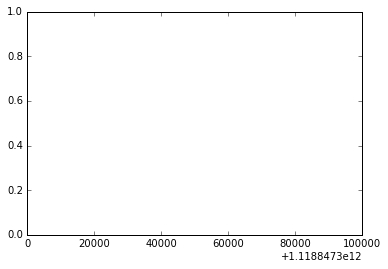

In [6]:
axes = plt.gca()
axes.set_xlim([t_min,t_max])

In [7]:
vID_group = dataset.groupby(['vIDa'])

In [8]:
vID_info = vID_group['Timestamp', 'v_a_Vel']

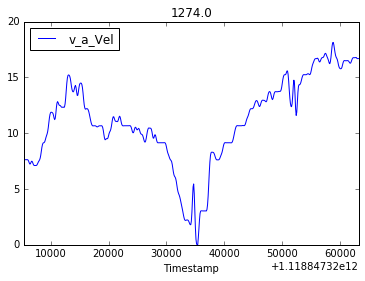

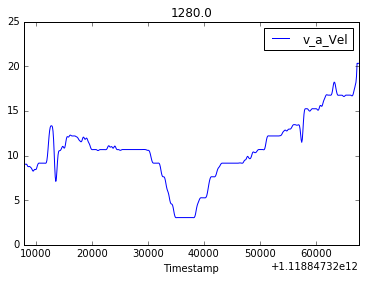

In [9]:
plt.figure()
for i, group in dataset.groupby(['vIDa']):
    if i == 1280 or i == 1274:
        group.plot(x='Timestamp', y='v_a_Vel', title=str(i))

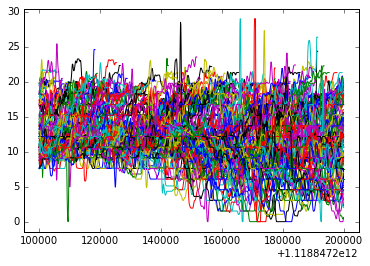

In [10]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['vIDa']):
    #if i < 1200:
        #print i
    ax.plot(group.Timestamp, group.v_a_Vel, label = str(i))
#ax.legend()

plt.show()

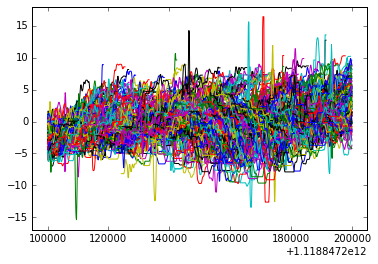

In [11]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['vIDa']):
    #if i < 1200:
        #print i
    ax.plot(group.Timestamp, group.delta_vel, label = str(i))
#ax.legend()

plt.show()

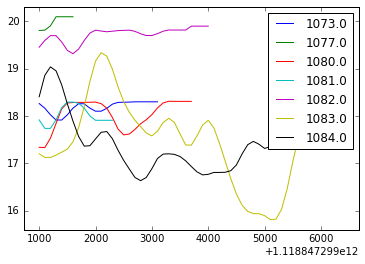

In [12]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['vIDa']):
    if i < 1085:
        #print i
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i))
ax.legend()

plt.show()

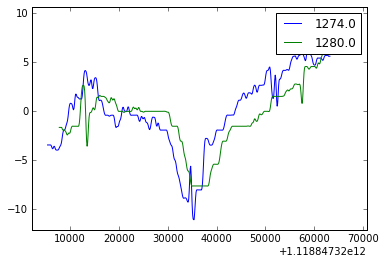

In [13]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['vIDa']):
    if i == 1280 or i == 1274:
        #print i
        ax.plot(group.Timestamp, group.delta_vel, label = str(i))
ax.legend()

plt.show()

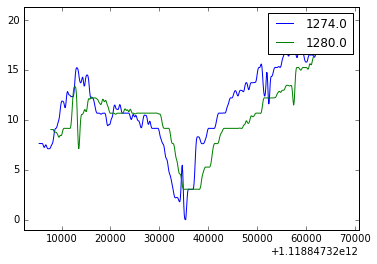

In [14]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['vIDa']):
    if i == 1280 or i == 1274:
        #print i
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i))
ax.legend()

plt.show()

In [15]:
dataset['delta_vel'].describe()

count    15450296.000000
mean            0.028567
std             3.128589
min           -15.367954
25%            -1.959090
50%            -0.211304
75%             2.004130
max            16.426508
Name: delta_vel, dtype: float64

In [16]:
dataset[:10]

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel
0,1.118847e+12,1073,1077,26.760834,2,18.263616,2,0,1083,22,18.18894,0.074676
1,1.118847e+12,1073,1080,9.739521,2,18.263616,2,0,1083,22,18.18894,0.074676
2,1.118847e+12,1073,1081,19.198605,2,18.263616,2,0,1083,22,18.18894,0.074676
3,1.118847e+12,1073,1082,20.679750,2,18.263616,2,0,1083,22,18.18894,0.074676
4,1.118847e+12,1073,1083,56.396881,2,18.263616,2,0,1083,22,18.18894,0.074676
5,1.118847e+12,1073,1084,40.510313,2,18.263616,2,0,1083,22,18.18894,0.074676
6,1.118847e+12,1073,1086,56.592865,2,18.263616,2,0,1083,22,18.18894,0.074676
7,1.118847e+12,1073,1087,19.093697,2,18.263616,2,0,1083,22,18.18894,0.074676
8,1.118847e+12,1073,1088,83.171880,2,18.263616,2,0,1083,22,18.18894,0.074676
9,1.118847e+12,1073,1089,15.309671,2,18.263616,2,0,1083,22,18.18894,0.074676


In [17]:
dataset.groupby(['v_a_Lane','vIDa'])

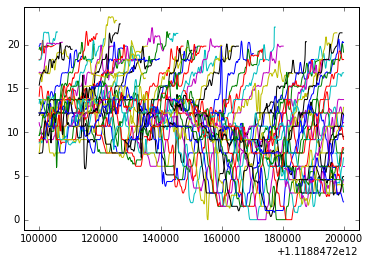

In [18]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[0] == 1:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[1]))
#ax.legend()

plt.show()

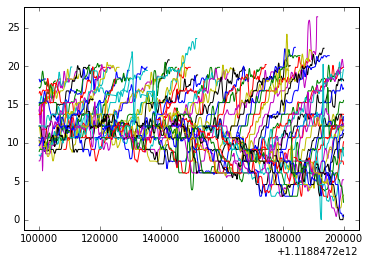

In [19]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[0] == 2:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[1]))
#ax.legend()

plt.show()

In [20]:
dataset[dataset['v_a_Vel'] == 0]

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel
1068977,1.118847e+12,1149,1094,237.260602,3,0,4,1136,1156,245,15.367954,-15.367954
1068978,1.118847e+12,1149,1096,240.314179,3,0,4,1136,1156,245,15.367954,-15.367954
1068979,1.118847e+12,1149,1099,253.064879,3,0,4,1136,1156,245,15.367954,-15.367954
1068980,1.118847e+12,1149,1100,217.963162,3,0,4,1136,1156,245,15.367954,-15.367954
1068981,1.118847e+12,1149,1101,208.736876,3,0,4,1136,1156,245,15.367954,-15.367954
1068982,1.118847e+12,1149,1104,233.741339,3,0,4,1136,1156,245,15.367954,-15.367954
1068983,1.118847e+12,1149,1105,201.264804,3,0,4,1136,1156,245,15.367954,-15.367954
1068984,1.118847e+12,1149,1106,187.050502,3,0,4,1136,1156,245,15.367954,-15.367954
1068985,1.118847e+12,1149,1107,233.327525,3,0,4,1136,1156,245,15.367954,-15.367954
1068986,1.118847e+12,1149,1108,173.078704,3,0,4,1136,1156,245,15.367954,-15.367954


In [21]:
vel0 = dataset[dataset['v_a_Vel'] == 0]

In [22]:
vel0[:10]

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel
1068977,1.118847e+12,1149,1094,237.260602,3,0,4,1136,1156,245,15.367954,-15.367954
1068978,1.118847e+12,1149,1096,240.314179,3,0,4,1136,1156,245,15.367954,-15.367954
1068979,1.118847e+12,1149,1099,253.064879,3,0,4,1136,1156,245,15.367954,-15.367954
1068980,1.118847e+12,1149,1100,217.963162,3,0,4,1136,1156,245,15.367954,-15.367954
1068981,1.118847e+12,1149,1101,208.736876,3,0,4,1136,1156,245,15.367954,-15.367954
1068982,1.118847e+12,1149,1104,233.741339,3,0,4,1136,1156,245,15.367954,-15.367954
1068983,1.118847e+12,1149,1105,201.264804,3,0,4,1136,1156,245,15.367954,-15.367954
1068984,1.118847e+12,1149,1106,187.050502,3,0,4,1136,1156,245,15.367954,-15.367954
1068985,1.118847e+12,1149,1107,233.327525,3,0,4,1136,1156,245,15.367954,-15.367954
1068986,1.118847e+12,1149,1108,173.078704,3,0,4,1136,1156,245,15.367954,-15.367954


In [23]:
vel0.groupby(['vIDa']).count()

,Timestamp,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel
vIDa,,,,,,,,,,,
1149,117,117,117,117,117,117,117,117,117,117,117
1274,240,240,240,240,240,240,240,240,240,240,240
1328,385,385,385,385,385,385,385,385,385,385,385
1347,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561
1389,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281
1397,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507
1431,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192
1443,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559
1471,129,129,129,129,129,129,129,129,129,129,129


In [24]:
vel0['Timestamp'].max()

1118847399700.0

In [25]:
vel0['Timestamp'].min()

1118847309500.0

In [26]:
v1149 = dataset['vIDa'] == 1149
v0 = dataset['v_a_Vel'] < 5
d0 = dataset['dist_ab'] < 50
dataset[v1149 & v0 & d0]

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel
1068655,1.118847e+12,1149,1129,46.787493,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068658,1.118847e+12,1149,1132,27.870894,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068660,1.118847e+12,1149,1134,27.055387,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068661,1.118847e+12,1149,1135,14.952611,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068662,1.118847e+12,1149,1136,49.334503,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068663,1.118847e+12,1149,1137,5.232251,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068664,1.118847e+12,1149,1138,12.629167,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068665,1.118847e+12,1149,1143,18.942788,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068666,1.118847e+12,1149,1144,16.847638,3,3.233928,4,1136,1156,245,15.367954,-12.134026
1068667,1.118847e+12,1149,1145,16.047411,3,3.233928,4,1136,1156,245,15.367954,-12.134026


In [27]:
v1137 = dataset['vIDa'] == 1137
vIDb_1137 = dataset['vIDb'] == 1149
distvv = dataset['dist_ab'] == 15.973205


dataset[v1137 & vIDb_1137 & distvv]

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel


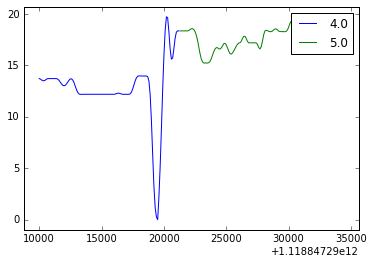

In [28]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[1] == 1149:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[0]))
ax.legend()

plt.show()

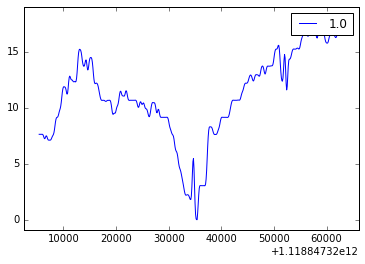

In [29]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[1] == 1274:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[0]))
ax.legend()

plt.show()

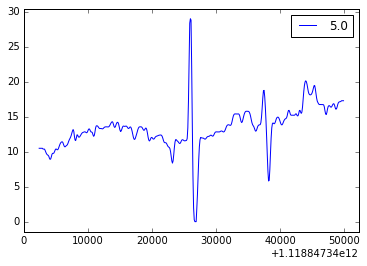

In [30]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[1] == 1328:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[0]))
ax.legend()

plt.show()

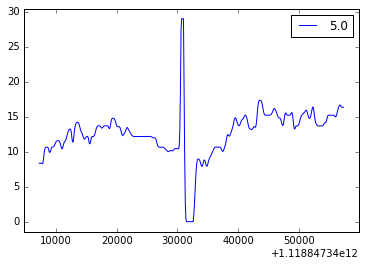

In [31]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[1] == 1347:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[0]))
ax.legend()

plt.show()

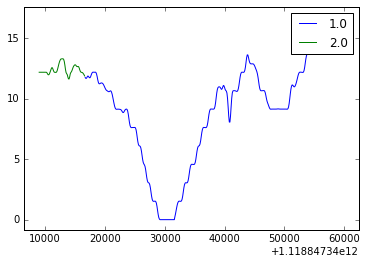

In [32]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in dataset.groupby(['v_a_Lane','vIDa']):
    if i[1] == 1389:
    #print i[0]
        ax.plot(group.Timestamp, group.v_a_Vel, label = str(i[0]))
ax.legend()

plt.show()